In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

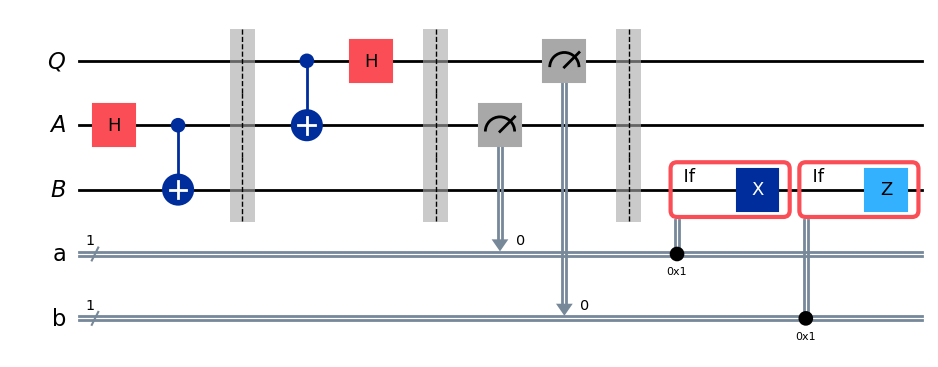

In [2]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("mpl"))

### Exercises for practice 

#### Question 1 

a) Write any two-qubit circuit on paper. b) Carry out the by-hand matrix multiplication to find both the net unitary matrix and final state. c) Code the 2 qubit circuit using qiskit d) Use qiskit to extract the net unitary matrix and final state to compare with your by-hand result.

#### Question 2 

Prove using both by-hand calculation and qiskit/numpy that the single-qubit circuits (1: HZH, 2: RX(pi) 3: X) are equivalent. Remember that global phases can be neglected.